In [2]:
import pandas as pd

In [5]:
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns = ['label' , 'text']

In [8]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['label'] = df['label'].map({'ham' : 0 , 'spam' : 1})

In [13]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.2, stratify=df['label'], random_state=42
)

In [19]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

In [20]:
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_vec, y_train)
y_pred_mnb = mnb.predict(X_test_vec)
print(" MultinomialNB")
print(classification_report(y_test, y_pred_mnb))


 MultinomialNB
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [21]:
bnb = BernoulliNB(alpha=0.1)
bnb.fit(X_train_vec.toarray(), y_train)
y_pred_bnb = bnb.predict(X_test_vec.toarray())
print(" BernoulliNB")
print(classification_report(y_test, y_pred_bnb))

 BernoulliNB
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [22]:
vectorizer_gnb = TfidfVectorizer(max_features=100, stop_words='english')
X_train_dense = vectorizer_gnb.fit_transform(X_train_text).toarray()
X_test_dense = vectorizer_gnb.transform(X_test_text).toarray()

In [23]:
gnb = GaussianNB()
gnb.fit(X_train_dense, y_train)
y_pred_gnb = gnb.predict(X_test_dense)
print("GaussianNB")
print(classification_report(y_test, y_pred_gnb))

GaussianNB 
              precision    recall  f1-score   support

           0       0.99      0.56      0.71       966
           1       0.25      0.97      0.40       149

    accuracy                           0.61      1115
   macro avg       0.62      0.76      0.56      1115
weighted avg       0.89      0.61      0.67      1115



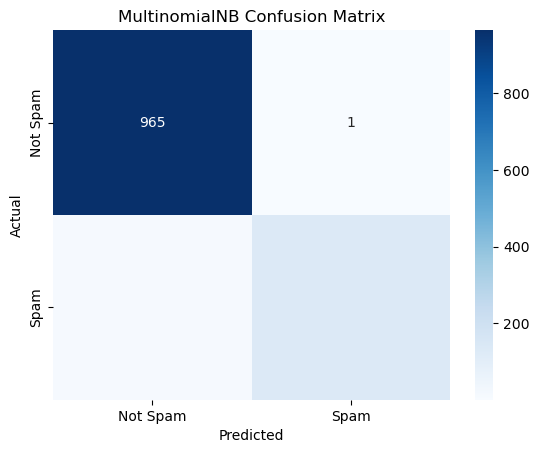

In [24]:
best_model_name = "MultinomialNB"
best_cm = confusion_matrix(y_test, y_pred_mnb)

sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'{best_model_name} Confusion Matrix')
plt.show()

In [25]:
new_message = ["Congratulations! You've won a free iPhone. Claim now!"]


In [27]:
X_new = vectorizer.transform(new_message)
pred = mnb.predict(X_new)
proba = mnb.predict_proba(X_new)

In [28]:
print(f"\n📝 Message: {new_message[0]}")
print(f"🔍 Prediction: {'SPAM' if pred[0] == 1 else 'NOT SPAM'}")
print(f"📊 Probabilities: Not Spam = {proba[0][0]:.4f}, Spam = {proba[0][1]:.4f}")


📝 Message: Congratulations! You've won a free iPhone. Claim now!
🔍 Prediction: SPAM
📊 Probabilities: Not Spam = 0.0474, Spam = 0.9526


In [29]:
new_message = ["Congratulations! You've won a free iPhone. Claim now!"]
X_new = vectorizer.transform(new_message)
pred = bnb.predict(X_new)
proba = gnb.predict_proba(X_new)

print(f"\n📝 Message: {new_message[0]}")
print(f"🔍 Prediction: {'SPAM' if pred[0] == 1 else 'NOT SPAM'}")
print(f"📊 Probabilities: Not Spam = {proba[0][0]:.4f}, Spam = {proba[0][1]:.4f}")

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.